<a href="https://colab.research.google.com/github/pranavmpillai3/Coin_detection/blob/main/coincounter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
print(os.getcwd())

/content


In [3]:
os.chdir('/content/drive/MyDrive/gdrive/CoinCounter')

In [4]:
print(os.getcwd())

/content/drive/MyDrive/gdrive/CoinCounter


In [5]:
!pip install ultralytics==8.0.196
from IPython import display
display.clear_output()

In [6]:
from IPython import display
display.clear_output()

In [9]:
import ultralytics
ultralytics.checks(0)

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ 


In [10]:
from ultralytics import YOLO

In [11]:
from IPython.display import display, Image

In [12]:
model = YOLO(os.path.join(os.getcwd(), 'YOLO', 'yolov8s.pt'))

100%|██████████| 21.5M/21.5M [00:00<00:00, 146MB/s]


In [13]:
!mkdir {os.getcwd()}/datasets
%cd {os.getcwd()}/datasets

/content/drive/MyDrive/gdrive/CoinCounter/datasets


In [14]:
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="3BoZDjtBdCVDJ1NoXTd7")
project = rf.workspace("coindetection-tv5vv").project("indian_coin_detector")
dataset = project.version(3).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
loading Roboflow workspace...
loa


Extracting Dataset Version Zip to indian_coin_detector-3 in yolov8:: 100%|██████████| 6096/6096 [00:46<00:00, 130.69it/s]


In [15]:
print(dataset.location)

/content/drive/MyDrive/gdrive/CoinCounter/datasets/indian_coin_detector-3


In [17]:
%cd {os.getcwd()}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 plots=True

/content/drive/MyDrive/gdrive/CoinCounter/datasets
100% 21.5M/21.5M [00:00<00:00, 151MB/s]
New https://pypi.org/project/ultralytics/8.1.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/gdrive/CoinCounter/datasets/indian_coin_detector-3/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_con

In [18]:
!ls {os.getcwd()}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1707039129.4c84a67e8d14.2482.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch6840.jpg  weights
P_curve.png					    train_batch6841.jpg
PR_curve.png					    train_batch6842.jpg


/content/drive/MyDrive/gdrive/CoinCounter/datasets


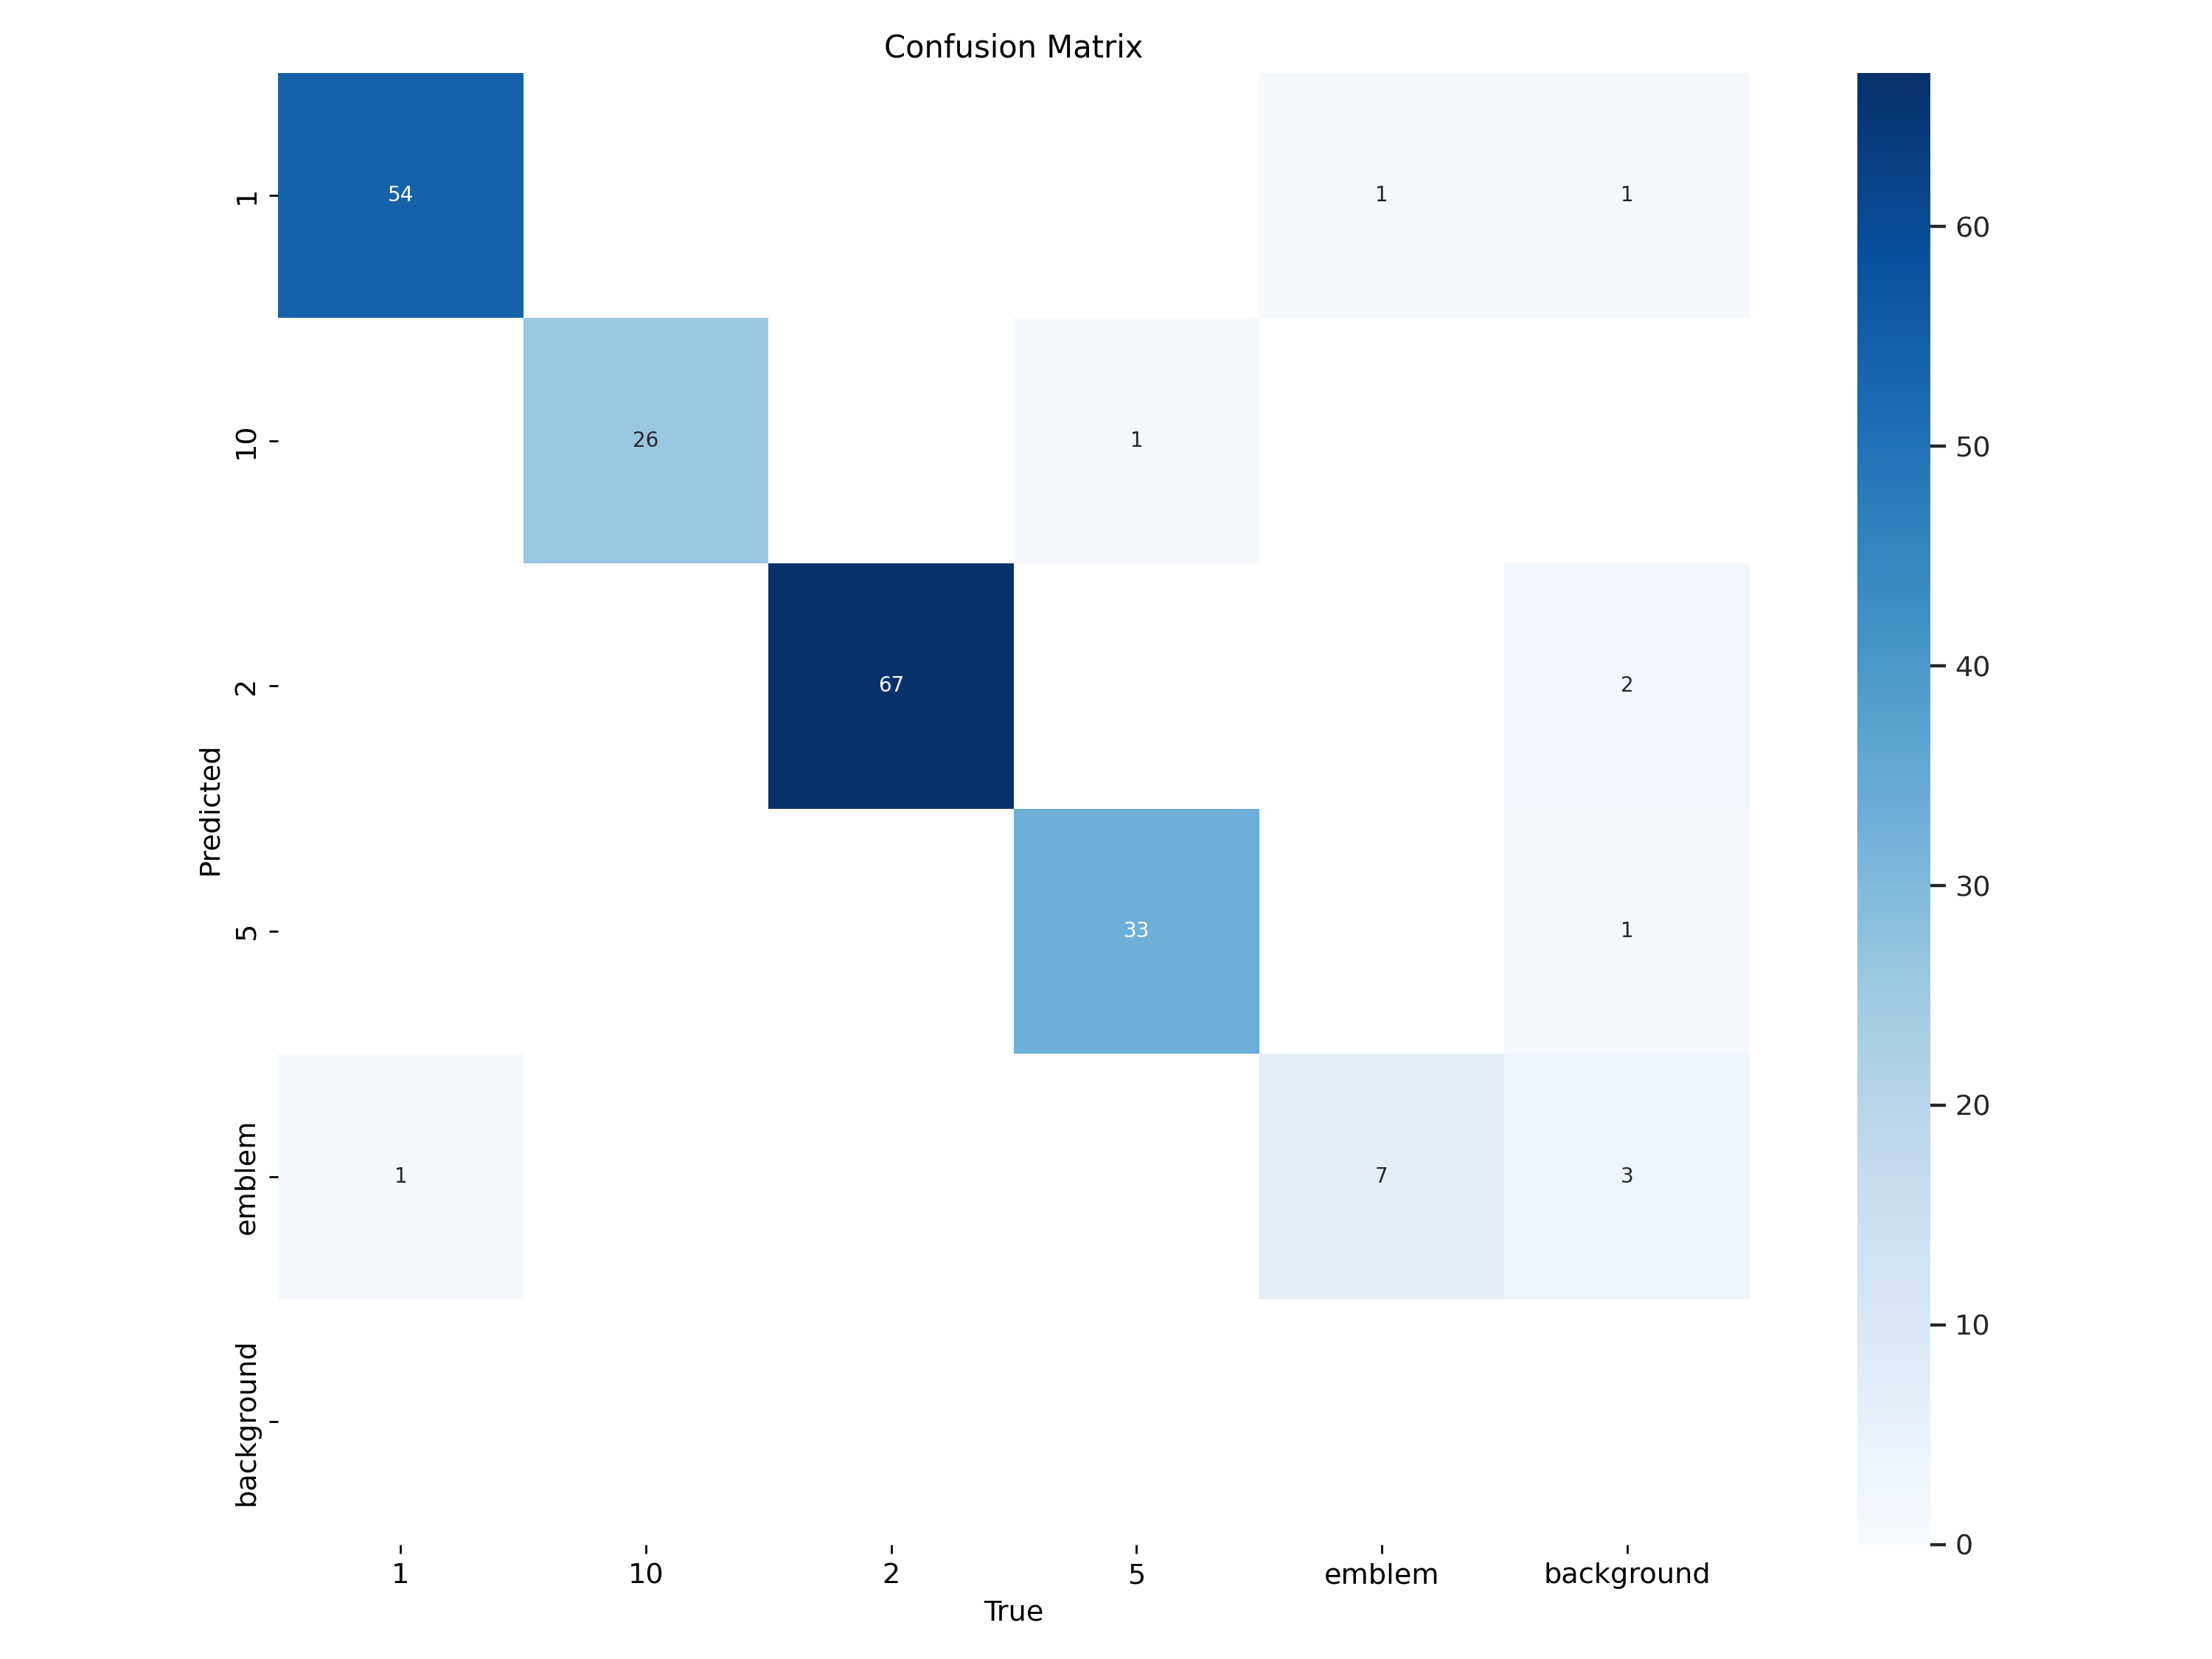

In [19]:
%cd {os.getcwd()}
Image(filename=f'{os.getcwd()}/runs/detect/train/confusion_matrix.png', width=600)

/content/drive/MyDrive/gdrive/CoinCounter/datasets


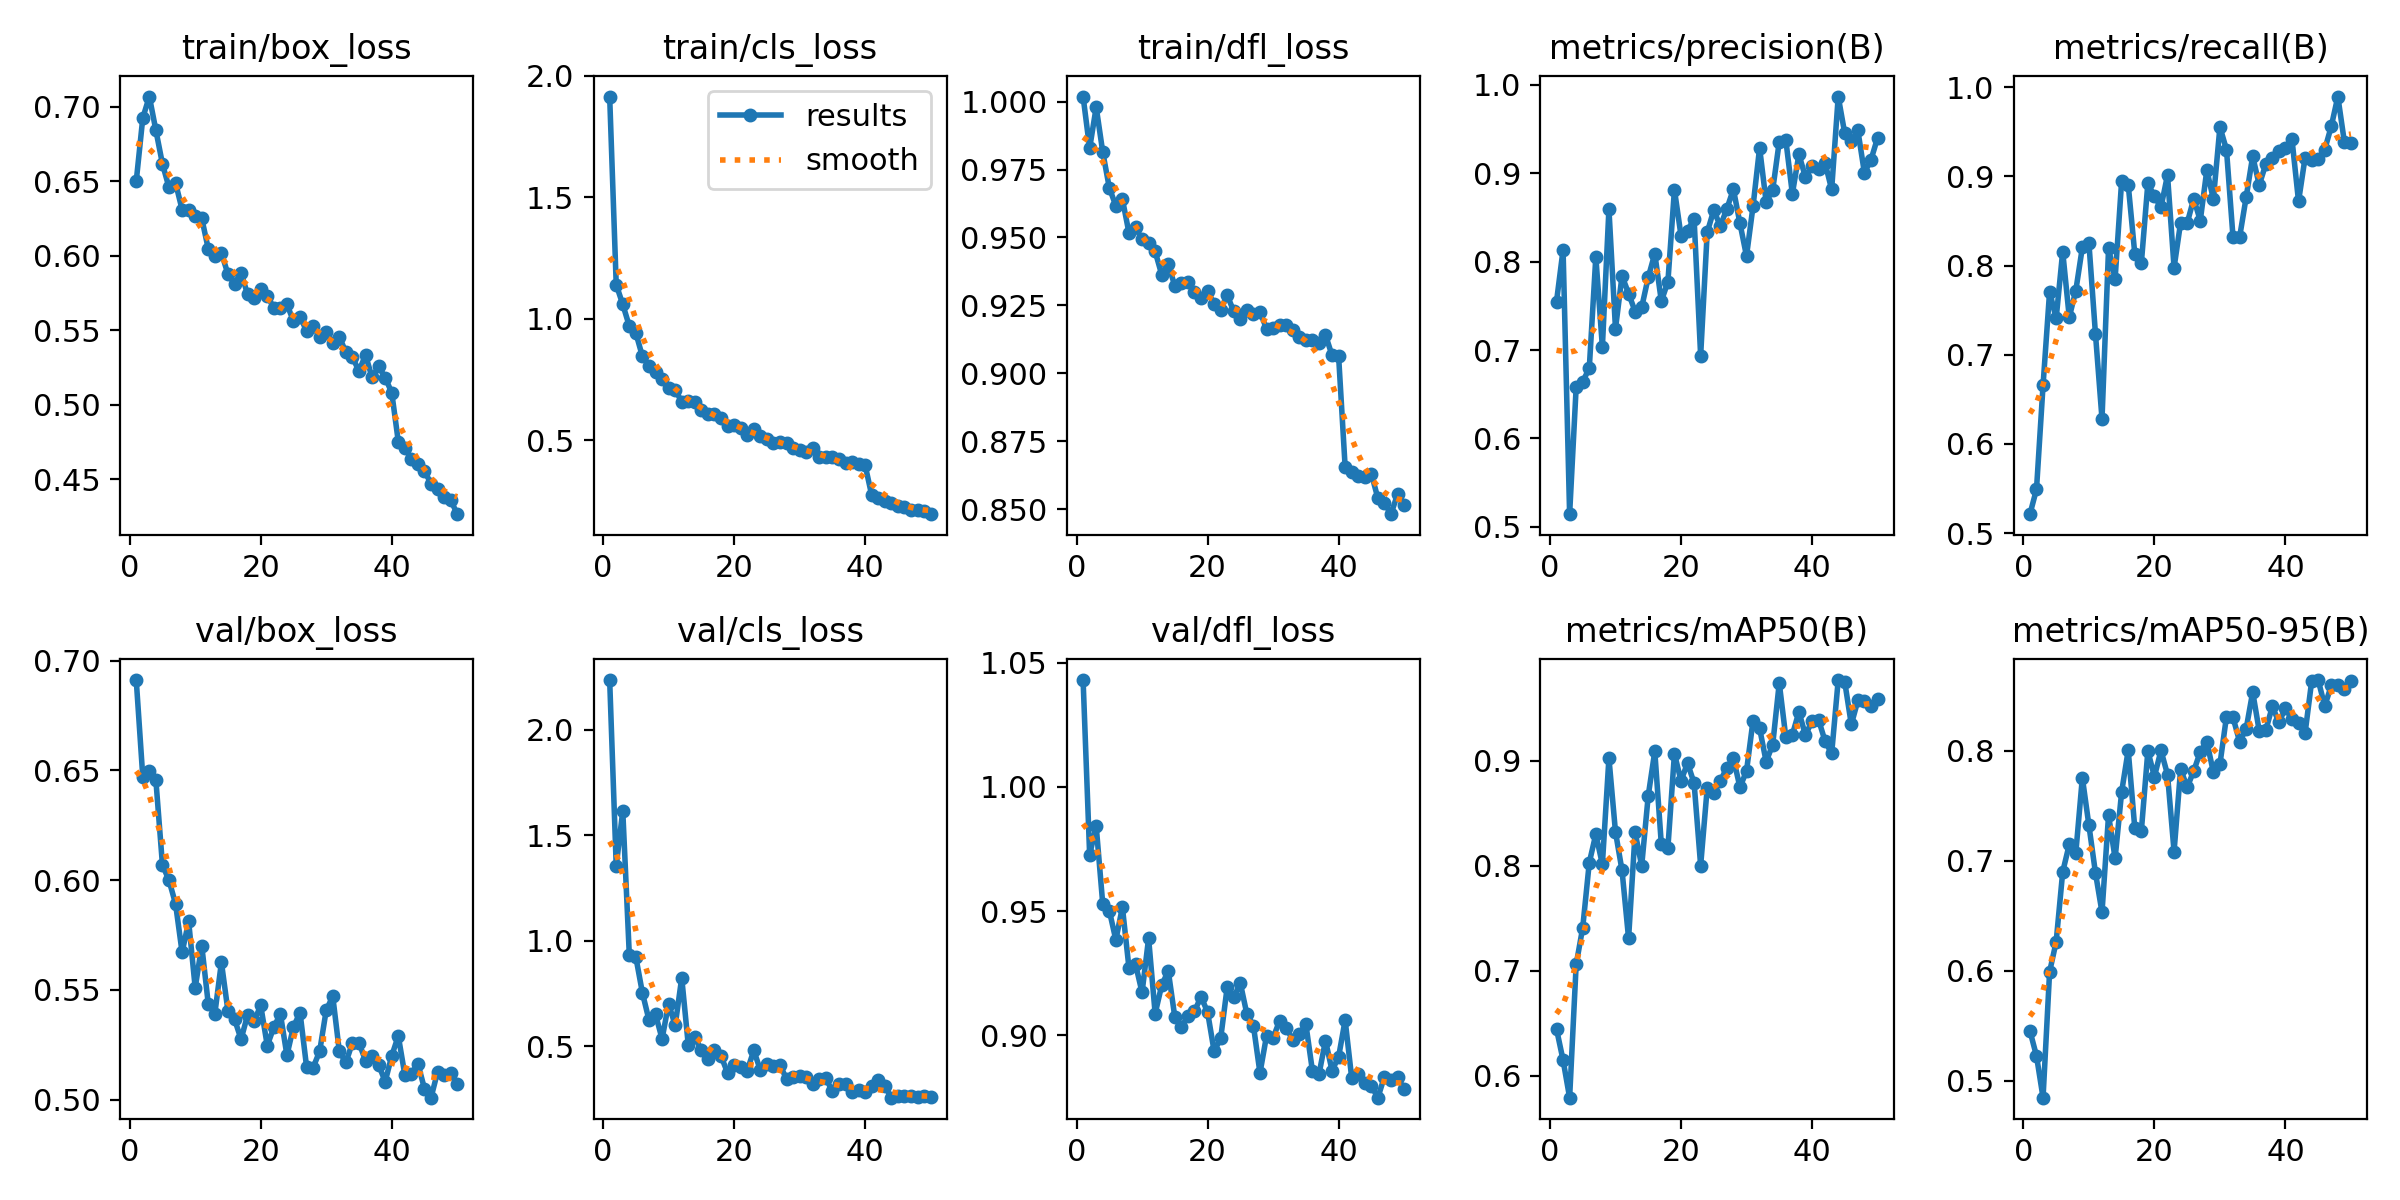

In [20]:
%cd {os.getcwd()}
Image(filename=f'{os.getcwd()}/runs/detect/train/results.png', width=600)

/content/drive/MyDrive/gdrive/CoinCounter/datasets


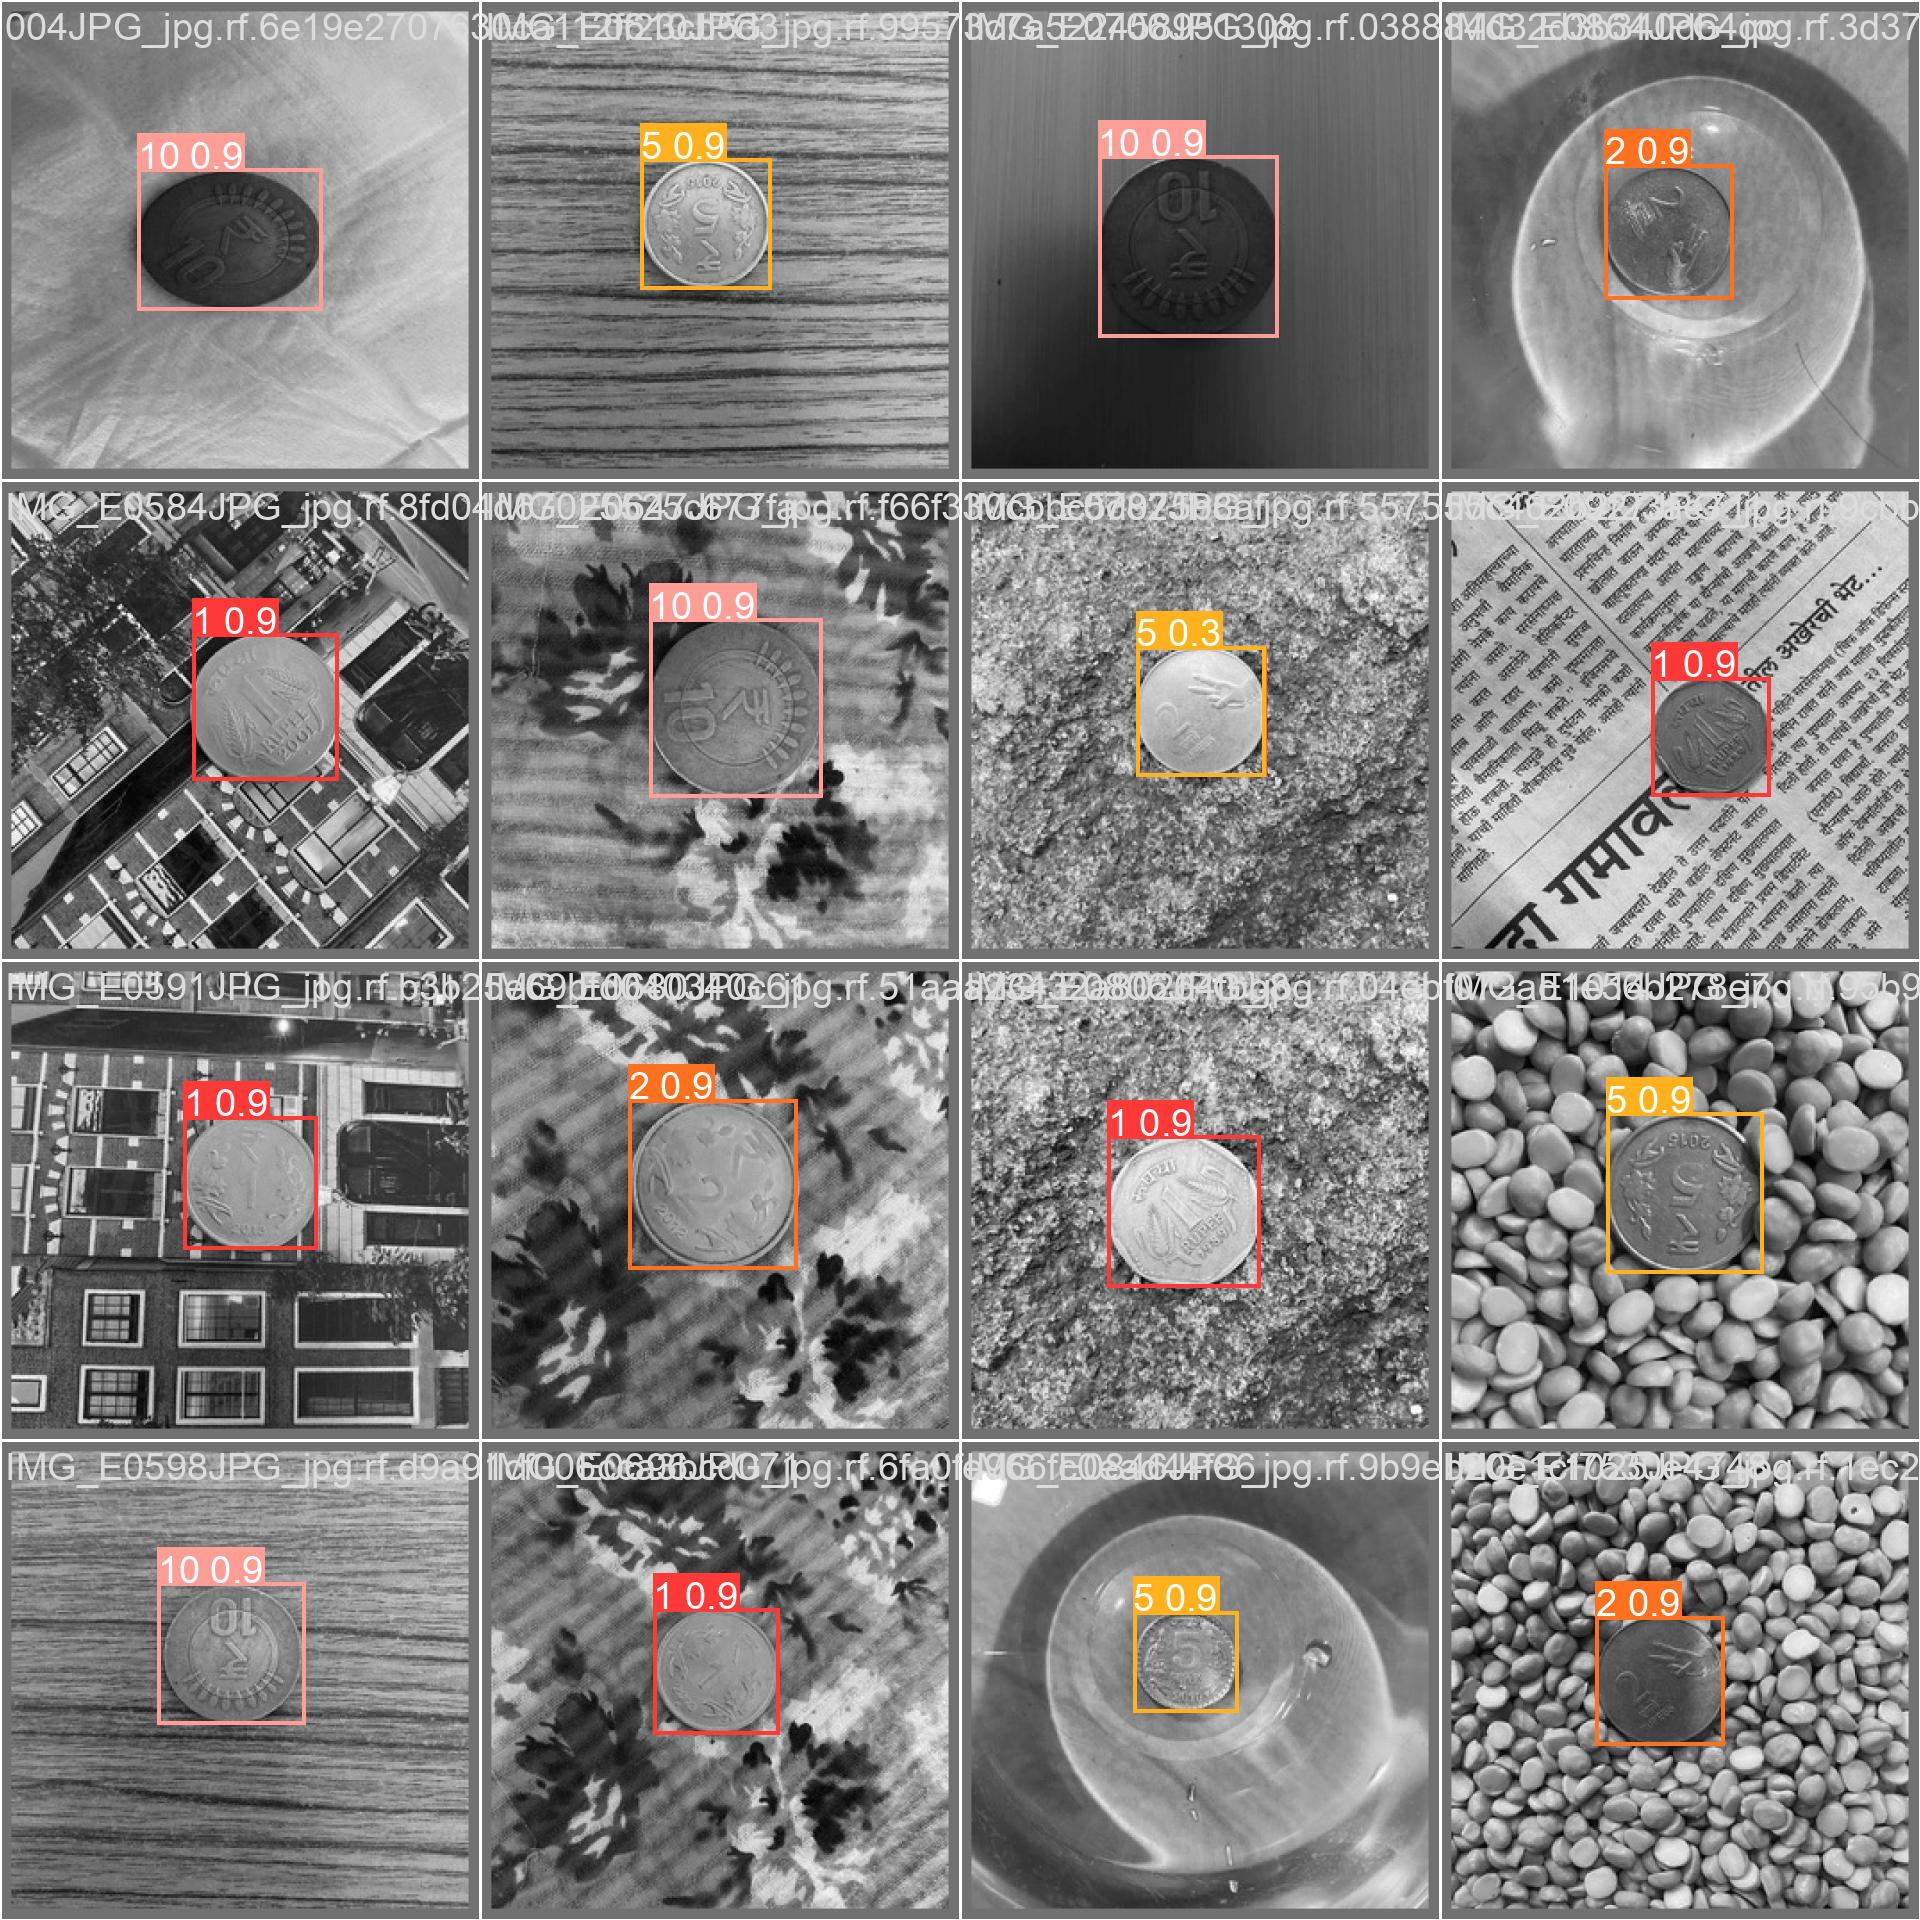

In [21]:
%cd {os.getcwd()}
Image(filename=f'{os.getcwd()}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [22]:
%cd {os.getcwd()}
!yolo task=detect mode=val model={os.getcwd()}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content/drive/MyDrive/gdrive/CoinCounter/datasets
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/gdrive/CoinCounter/datasets/indian_coin_detector-3/valid/labels.cache... 190 images, 0 backgrounds, 0 corrupt: 100% 190/190 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:06<00:00,  1.79it/s]
                   all        190        190      0.948      0.923      0.975      0.865
                     1        190         55      0.964      0.982      0.993      0.901
                    10        190         26      0.962       0.97      0.994      0.902
                     2        190         67          1      0.999      0.995      0.885
                     5        190         34      0.997      0.912      0.987      0.884
                emblem        1

In [23]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{os.getcwd()}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")